## Basic Operations

In [ ]:
#import pre-requisite modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
#load the dataset
data=pd.read_csv('/content/drive/MyDrive/datasets/netflix dataset.csv')
data.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


## Data Preprocessing

In [ ]:
columns = list(data)
columns

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [ ]:
(data[columns[0:9]]==0).sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
data.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
data['date_added']

,date_added
0,9/25/2021
1,9/24/2021
2,9/24/2021
3,9/22/2021
4,9/24/2021
...,...
8785,1/17/2017
8786,9/13/2018
8787,12/15/2016
8788,6/23/2018


In [ ]:
data['date_added']=pd.to_datetime(data['date_added'])
data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.to_csv('netflix_data.csv',index=False)

In [ ]:
from google.colab import files
files.download('netflix_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### 1. Count the number of Movies and TV Shows


/tmp/ipython-input-51-857491936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.index,y=type_count.values,palette='Set3')


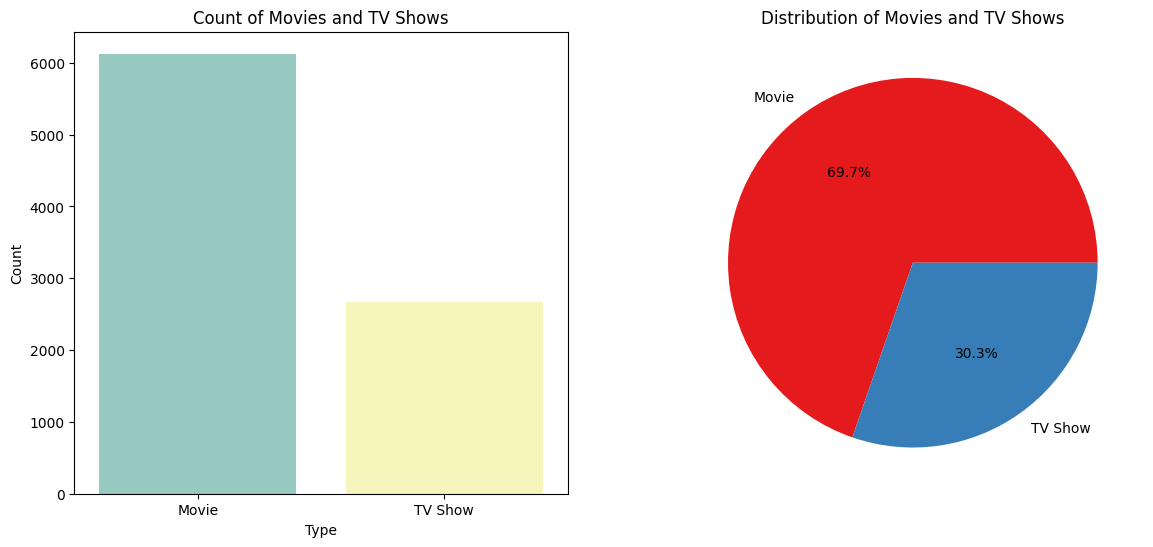

In [ ]:
type_count=data['type'].value_counts()

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)  #1 Row, 2 Col, 1st plot
sns.barplot(x=type_count.index,y=type_count.values,palette='Set3')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(type_count.values,labels=type_count.index,autopct='%1.1f%%',colors=sns.color_palette('Set1'))
plt.title('Distribution of Movies and TV Shows')
plt.show()

### 2. Most Common Genres

/tmp/ipython-input-52-605909287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10],y=genre_counts.values[:10],palette='Set2')


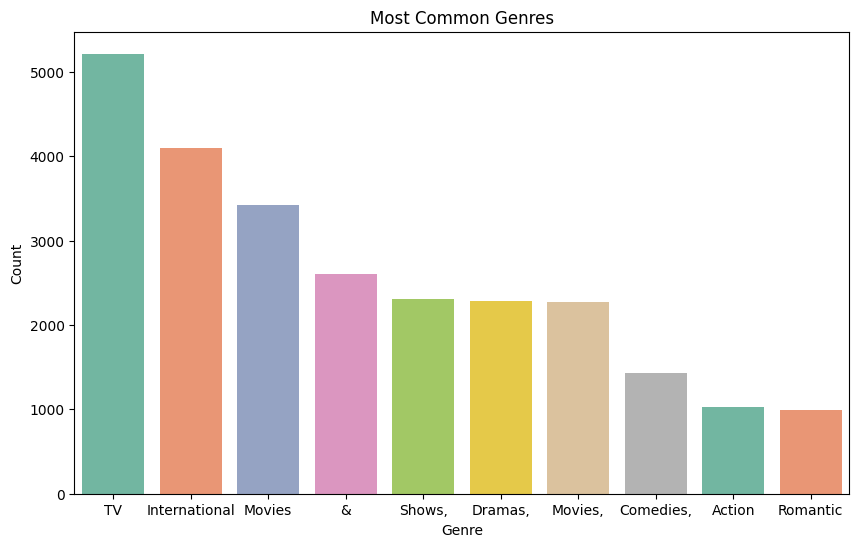

In [ ]:
data['genre']=data['listed_in'].apply(lambda x: x.split())
all_genres=[genre for sublist in data['genre'] for genre in sublist]
genre_counts=pd.Series(all_genres).value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index[:10],y=genre_counts.values[:10],palette='Set2')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

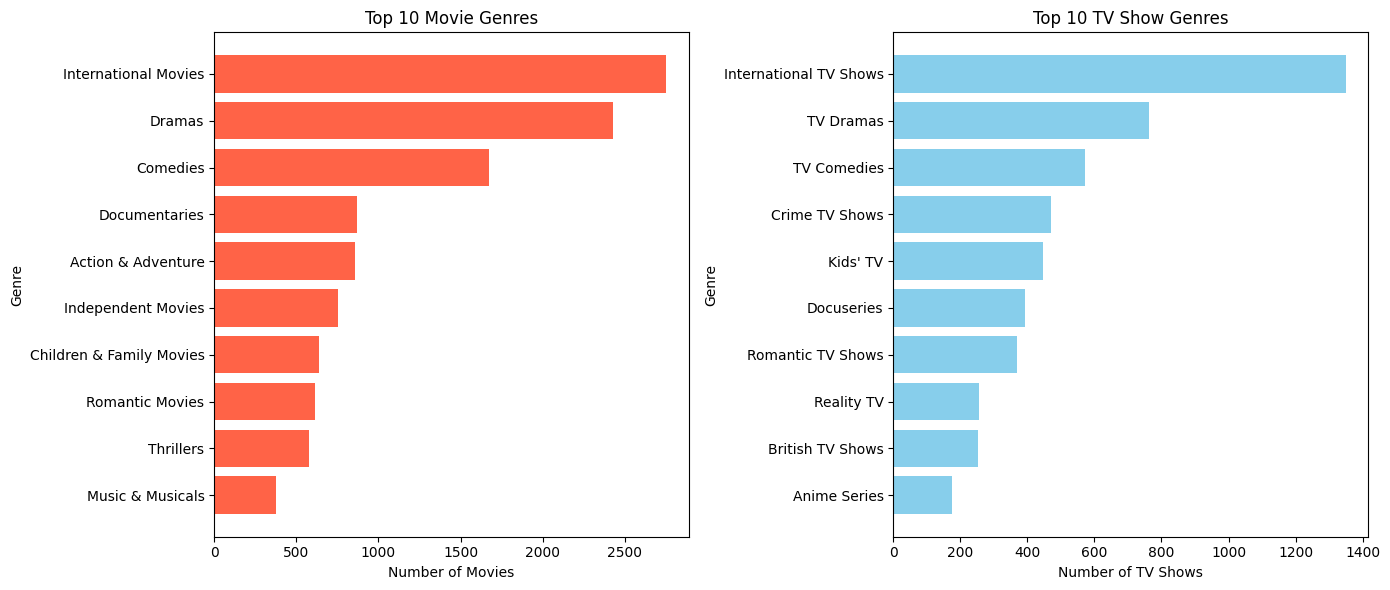

In [ ]:
# Split the 'listed_in' column and explode it so each genre is in a separate row
data['listed_in'] = data['listed_in'].str.split(', ')
data_exploded = data.explode('listed_in')

# Group and count genres
movie_genre = data_exploded[data_exploded['type'] == 'Movie']['listed_in'].value_counts().head(10)
show_genre = data_exploded[data_exploded['type'] == 'TV Show']['listed_in'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# ----- Subplot 1: Movie Genres -----
plt.subplot(1, 2, 1)
plt.barh(movie_genre.index[::-1], movie_genre.values[::-1], color='tomato')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# ----- Subplot 2: TV Show Genres -----
plt.subplot(1, 2, 2)
plt.barh(show_genre.index[::-1], show_genre.values[::-1], color='skyblue')
plt.title('Top 10 TV Show Genres')
plt.xlabel('Number of TV Shows')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()


### 3. Rating Frequency

/tmp/ipython-input-53-4118010367.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating',y='count',data=rating,palette='Set3')


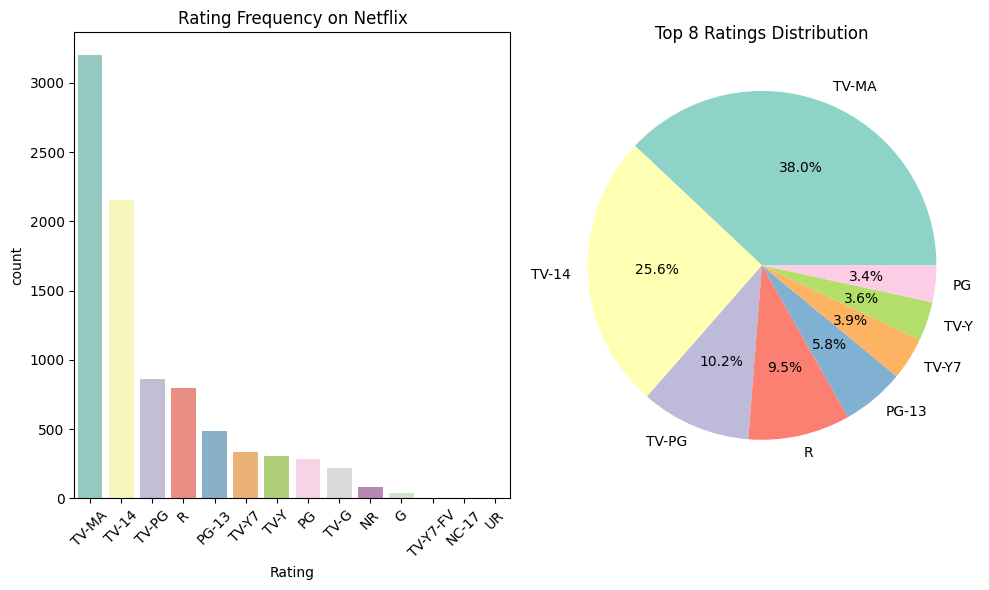

In [ ]:

rating=data['rating'].value_counts().reset_index()
rating.columns=['Rating','count']
rating=rating.sort_values(by='count',ascending=False)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x='Rating',y='count',data=rating,palette='Set3')
plt.xticks(rotation=45)
plt.title('Rating Frequency on Netflix')
plt.xlabel('Rating')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.pie(rating['count'][:8], labels=rating['Rating'][:8] ,autopct='%1.1f%%',colors=sns.color_palette('Set3'))
plt.title('Top 8 Ratings Distribution')

plt.tight_layout()
plt.show()

### 4. Content Added Over Time

/tmp/ipython-input-54-1921685241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added',data=data,palette='Set2')


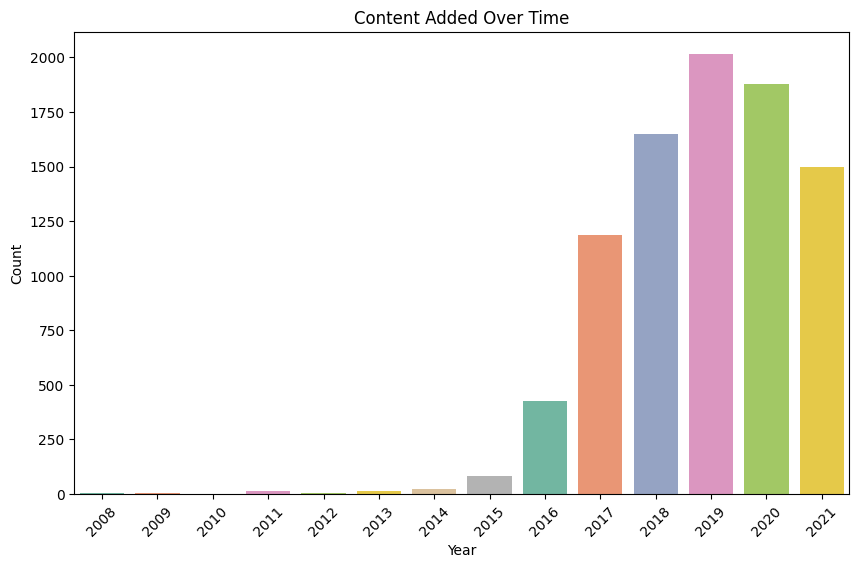

In [ ]:
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

year_counts=data['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.countplot(x='year_added',data=data,palette='Set2')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 5. Top 10 directors with most titles

/tmp/ipython-input-55-2695860775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values,y=top_directors.index,palette='Set3')


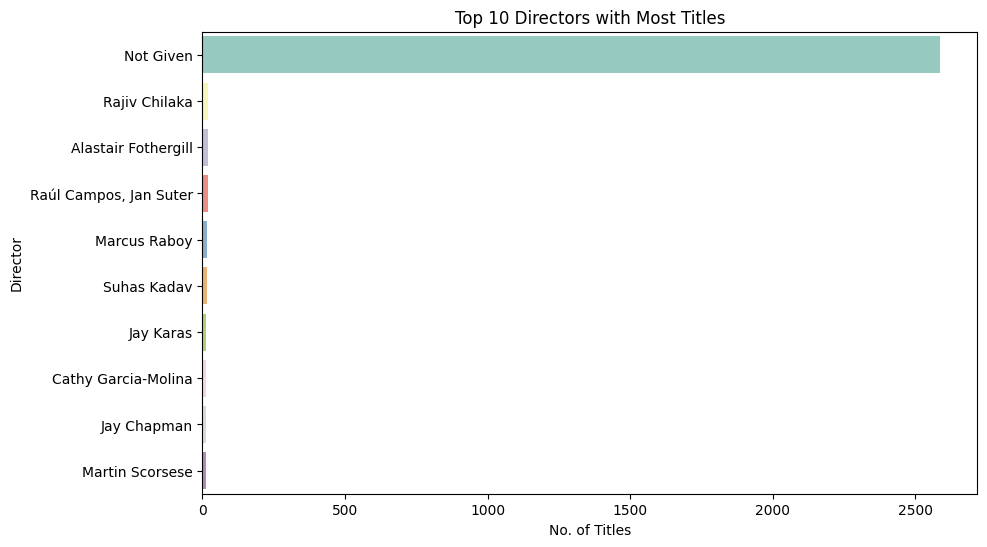

In [ ]:
top_directors=data['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values,y=top_directors.index,palette='Set3')
plt.title('Top 10 Directors with Most Titles')
plt.ylabel('Director')
plt.xlabel('No. of Titles')
plt.show()

### 6. Word Cloud of Movie Titles

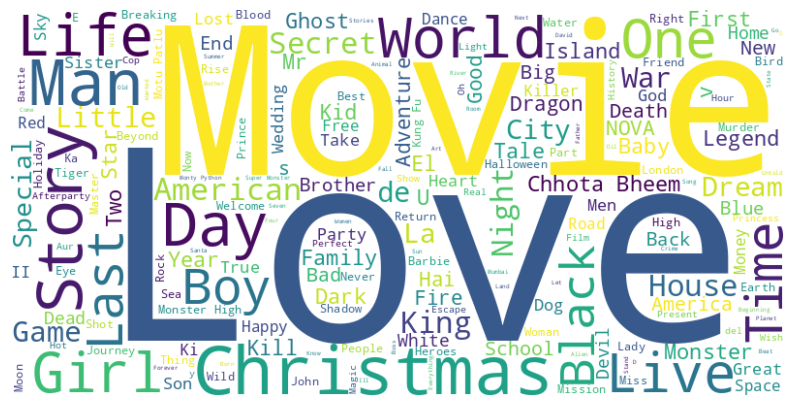

In [ ]:
movie_titles=data[data['type']=='Movie']['title']
wordcloud=WordCloud(width=800, height=400, background_color='white').generate(' '.join(movie_titles))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 7. Country wise distribution

/tmp/ipython-input-57-919350199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country',y='count',data=top_countries,palette='Set2')


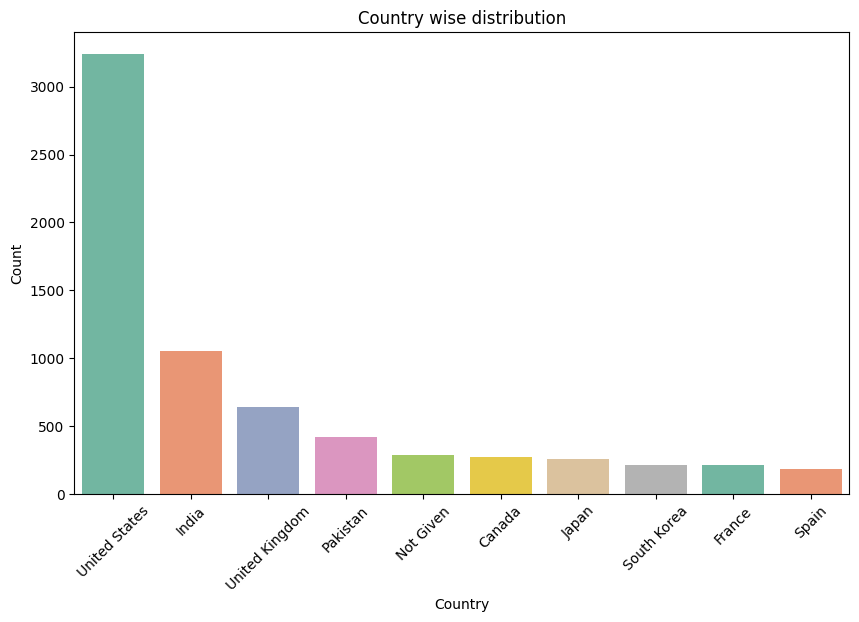

In [ ]:
data['country'].value_counts()
top_countries=data['country'].value_counts().reset_index()
top_countries=top_countries.sort_values(by='count',ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(x='country',y='count',data=top_countries,palette='Set2')
plt.title('Country wise distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 8. Monthly releases

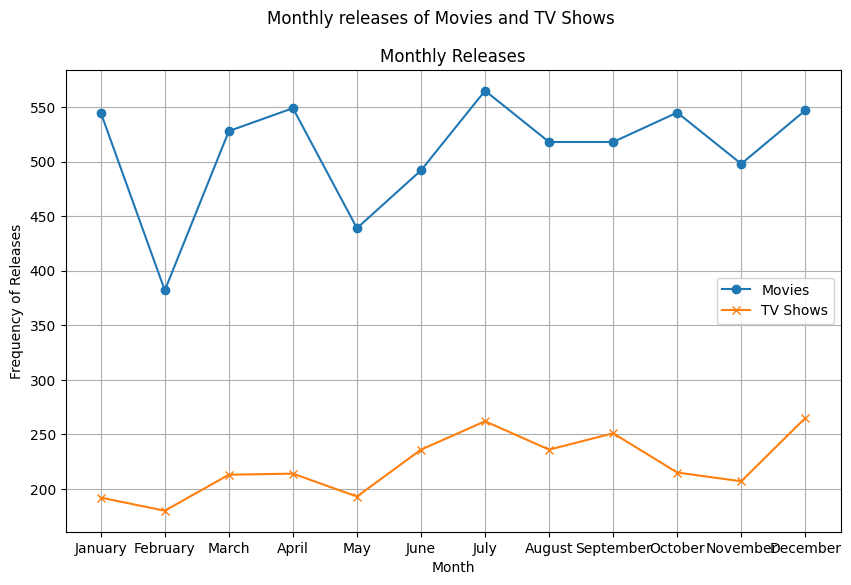

In [ ]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

movie_releases=data[data['type']=='Movie']['month'].value_counts().sort_index()
show_releases=data[data['type']=='TV Show']['month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(movie_releases.index,movie_releases.values,label='Movies',marker='o')
plt.plot(show_releases.index,show_releases.values,label='TV Shows',marker='x')
plt.title('Monthly Releases')
plt.xlabel('Month')
plt.ylabel('Frequency of Releases')
plt.xticks(range(1,13),[
    'January', 'February', 'March', 'April',
    'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV Shows")
plt.show()

### 9. Yearly releases of Movies and TV Shows

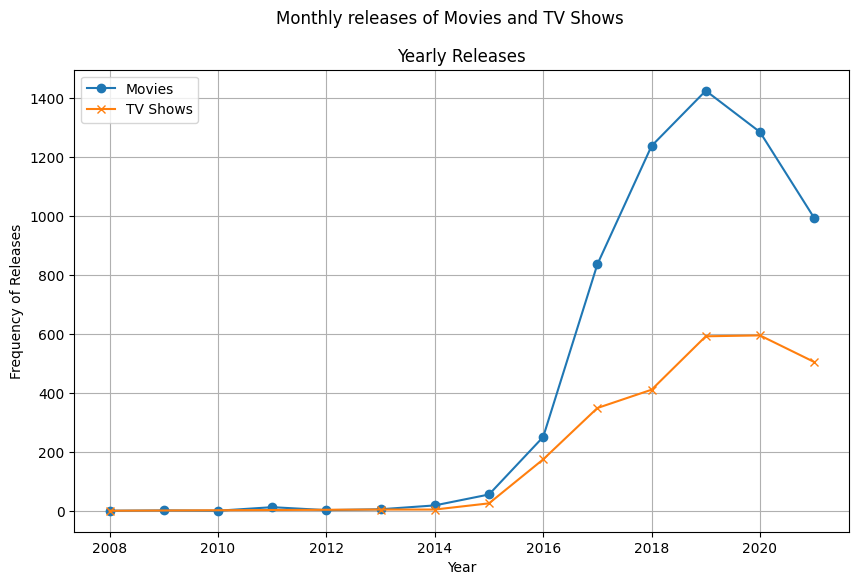

In [ ]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
show_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(movie_releases.index,movie_releases.values,label='Movies',marker='o')
plt.plot(show_releases.index,show_releases.values,label='TV Shows',marker='x')
plt.title('Yearly Releases')
plt.xlabel('Year')
plt.ylabel('Frequency of Releases')
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV Shows")
plt.show()

### 10. Daily releases of Movies and TV Shows

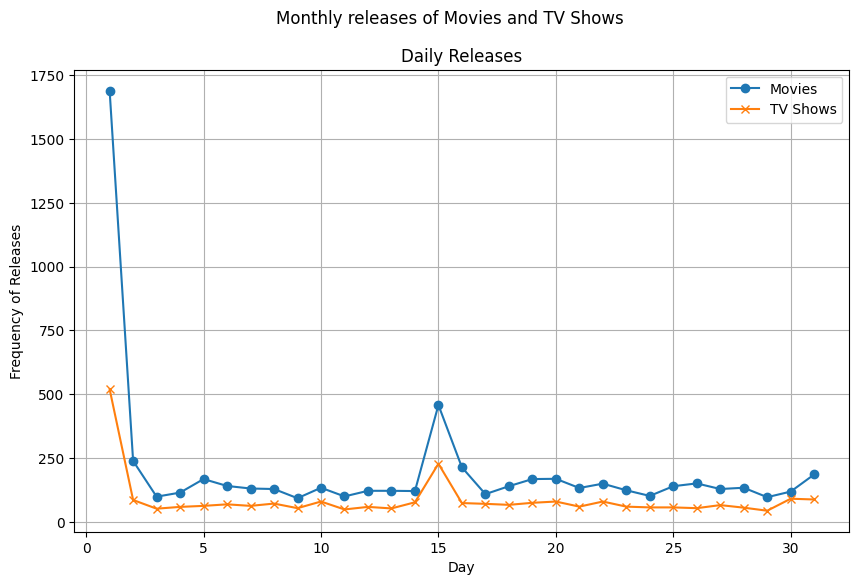

In [ ]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

movie_releases=data[data['type']=='Movie']['day'].value_counts().sort_index()
show_releases=data[data['type']=='TV Show']['day'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(movie_releases.index,movie_releases.values,label='Movies',marker='o')
plt.plot(show_releases.index,show_releases.values,label='TV Shows',marker='x')
plt.title('Daily Releases')
plt.xlabel('Day')
plt.ylabel('Frequency of Releases')
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV Shows")
plt.show()